In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3]:
df = pd.read_csv('Beijing2020.csv') 
df


,OBJECTID,Name,Layer,Average housing prices,School density,Distance away from the CBD,Technology companies,Commercial building density,Medical institution density,Road density,Financial institution density,Retail store density,Park density
0,233,Andingmen Subdistrict,neighborhood,127646.89460,13.82,6.69,1,42.61,21.31,20.89,2.88,42.04,23.0
1,268,Anding town,neighborhood,28756.29558,0.18,33.06,2,0.10,0.44,5.05,0.18,1.17,0.8
2,299,Anzhen sub district,neighborhood,84860.48593,16.22,8.92,12,36.05,36.50,17.08,27.94,33.34,18.0
3,280,Olympic Village sub district,neighborhood,77119.39302,2.80,13.79,51,8.86,9.33,16.27,6.06,5.75,9.3
4,78,Babaoshan sub district,neighborhood,58703.55517,4.84,19.34,1,10.96,20.39,11.40,13.51,23.19,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,266,Zhongguancun National Independent Innovation D...,neighborhood,31141.29749,0.29,29.34,11,4.67,5.84,8.91,1.61,3.36,5.8
327,179,Zhongguancun sub district,neighborhood,126851.06970,12.85,14.11,167,44.02,30.23,17.64,23.05,48.94,15.1
328,208,Zhoukoudian Regional Office,neighborhood,19502.52892,0.17,54.42,1,0.23,0.43,2.64,0.07,0.61,0.4
329,177,Zizhuyuan Subdistrict,neighborhood,100827.89110,24.49,14.08,79,38.41,18.57,13.98,14.25,22.73,16.0


In [4]:
df['Average housing prices'].describe() #查看分布

count       331.000000
mean      51013.522592
std       31273.108187
min       17015.723590
25%       28648.138990
50%       38077.890870
75%       67817.742650
max      150324.357300
Name: Average housing prices, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OBJECTID                       331 non-null    int64  
 1   Name                           331 non-null    object 
 2   Layer                          331 non-null    object 
 3   Average housing prices         331 non-null    float64
 4   School density                 331 non-null    float64
 5   Distance away from the CBD     331 non-null    float64
 6   Technology companies           331 non-null    int64  
 7   Commercial building density    331 non-null    float64
 8   Medical institution density    331 non-null    float64
 9   Road density                   331 non-null    float64
 10  Financial institution density  331 non-null    float64
 11  Retail store density           331 non-null    float64
 12  Park density                   331 non-null    flo

In [6]:
df.isnull().sum()

OBJECTID                         0
Name                             0
Layer                            0
Average housing prices           0
School density                   0
Distance away from the CBD       0
Technology companies             0
Commercial building density      0
Medical institution density      0
Road density                     0
Financial institution density    0
Retail store density             0
Park density                     0
dtype: int64

In [7]:
df=df.dropna()
df

,OBJECTID,Name,Layer,Average housing prices,School density,Distance away from the CBD,Technology companies,Commercial building density,Medical institution density,Road density,Financial institution density,Retail store density,Park density
0,233,Andingmen Subdistrict,neighborhood,127646.89460,13.82,6.69,1,42.61,21.31,20.89,2.88,42.04,23.0
1,268,Anding town,neighborhood,28756.29558,0.18,33.06,2,0.10,0.44,5.05,0.18,1.17,0.8
2,299,Anzhen sub district,neighborhood,84860.48593,16.22,8.92,12,36.05,36.50,17.08,27.94,33.34,18.0
3,280,Olympic Village sub district,neighborhood,77119.39302,2.80,13.79,51,8.86,9.33,16.27,6.06,5.75,9.3
4,78,Babaoshan sub district,neighborhood,58703.55517,4.84,19.34,1,10.96,20.39,11.40,13.51,23.19,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,266,Zhongguancun National Independent Innovation D...,neighborhood,31141.29749,0.29,29.34,11,4.67,5.84,8.91,1.61,3.36,5.8
327,179,Zhongguancun sub district,neighborhood,126851.06970,12.85,14.11,167,44.02,30.23,17.64,23.05,48.94,15.1
328,208,Zhoukoudian Regional Office,neighborhood,19502.52892,0.17,54.42,1,0.23,0.43,2.64,0.07,0.61,0.4
329,177,Zizhuyuan Subdistrict,neighborhood,100827.89110,24.49,14.08,79,38.41,18.57,13.98,14.25,22.73,16.0


In [8]:
y=df["Average housing prices"]
y

0      127646.89460
1       28756.29558
2       84860.48593
3       77119.39302
4       58703.55517
           ...     
326     31141.29749
327    126851.06970
328     19502.52892
329    100827.89110
330     78246.61019
Name: Average housing prices, Length: 331, dtype: float64

In [9]:
X= df[df.columns[4:]]
X

,School density,Distance away from the CBD,Technology companies,Commercial building density,Medical institution density,Road density,Financial institution density,Retail store density,Park density
0,13.82,6.69,1,42.61,21.31,20.89,2.88,42.04,23.0
1,0.18,33.06,2,0.10,0.44,5.05,0.18,1.17,0.8
2,16.22,8.92,12,36.05,36.50,17.08,27.94,33.34,18.0
3,2.80,13.79,51,8.86,9.33,16.27,6.06,5.75,9.3
4,4.84,19.34,1,10.96,20.39,11.40,13.51,23.19,30.6
...,...,...,...,...,...,...,...,...,...
326,0.29,29.34,11,4.67,5.84,8.91,1.61,3.36,5.8
327,12.85,14.11,167,44.02,30.23,17.64,23.05,48.94,15.1
328,0.17,54.42,1,0.23,0.43,2.64,0.07,0.61,0.4
329,24.49,14.08,79,38.41,18.57,13.98,14.25,22.73,16.0


In [10]:
df.describe()

,OBJECTID,Average housing prices,School density,Distance away from the CBD,Technology companies,Commercial building density,Medical institution density,Road density,Financial institution density,Retail store density,Park density
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,166.000000,51013.522592,4.295831,34.082356,9.948640,12.007734,10.422961,8.104350,7.422326,14.241299,6.501813
std,95.695698,31273.108187,9.023814,25.490742,19.987733,15.689438,14.009121,5.991253,13.782171,17.911731,7.899605
min,1.000000,17015.723590,0.000000,1.110000,0.000000,0.000000,0.010000,0.300000,0.000000,0.150000,0.000000
25%,83.500000,28648.138990,0.180000,12.990000,0.000000,0.345000,0.460000,2.920000,0.125000,1.305000,0.500000
50%,166.000000,38077.890870,1.120000,28.320000,3.000000,4.140000,3.480000,6.830000,1.070000,4.390000,3.100000
75%,248.500000,67817.742650,5.875000,50.830000,10.000000,19.400000,18.350000,11.605000,10.620000,22.790000,10.300000
max,331.000000,150324.357300,89.240000,116.430000,167.000000,63.380000,99.890000,33.390000,108.260000,80.120000,47.900000


In [11]:
X.select_dtypes(include=['object']).columns #no object columns

Index([], dtype='object')

vif

In [12]:
df1 = df[df.columns[4:]]
df1

,School density,Distance away from the CBD,Technology companies,Commercial building density,Medical institution density,Road density,Financial institution density,Retail store density,Park density
0,13.82,6.69,1,42.61,21.31,20.89,2.88,42.04,23.0
1,0.18,33.06,2,0.10,0.44,5.05,0.18,1.17,0.8
2,16.22,8.92,12,36.05,36.50,17.08,27.94,33.34,18.0
3,2.80,13.79,51,8.86,9.33,16.27,6.06,5.75,9.3
4,4.84,19.34,1,10.96,20.39,11.40,13.51,23.19,30.6
...,...,...,...,...,...,...,...,...,...
326,0.29,29.34,11,4.67,5.84,8.91,1.61,3.36,5.8
327,12.85,14.11,167,44.02,30.23,17.64,23.05,48.94,15.1
328,0.17,54.42,1,0.23,0.43,2.64,0.07,0.61,0.4
329,24.49,14.08,79,38.41,18.57,13.98,14.25,22.73,16.0


Text(0.5, 1.0, 'Correlation Matrix')

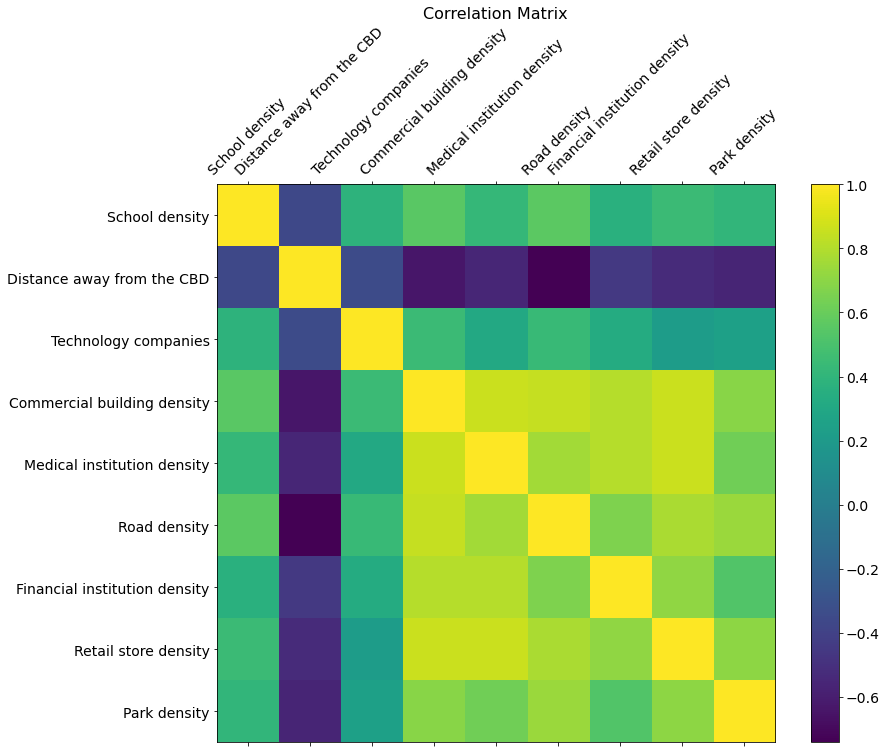

In [13]:
df=df1
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(13, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [14]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [15]:
x_VIF = drop_column_using_vif_(X, thresh=5)
print("The columns remaining after VIF selection are:")
print(x_VIF.columns)

Max VIF: 9.434286341736572
Dropping: Commercial building density
Max VIF: 5.752241214530408
Dropping: Medical institution density
Max VIF: 5.679714547322527
Dropping: Road density
Max VIF: 3.0502712047418927
The columns remaining after VIF selection are:
Index(['School density', 'Distance away from the CBD', 'Technology companies',
       'Financial institution density', 'Retail store density',
       'Park density'],
      dtype='object')


/Users/lin/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression().fit(x_VIF, y)

In [18]:
print('Constant term: ', reg.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": x_VIF.columns.values, "coef":reg.coef_})
print(df_coef_lr_VIF)

Constant term:  50132.28378309436
                             var        coef
0                 School density  466.881879
1     Distance away from the CBD -426.804078
2           Technology companies  180.194175
3  Financial institution density  342.420873
4           Retail store density  283.820259
5                   Park density  776.070693


In [19]:
# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=y, exog=sm.add_constant(x_VIF)).fit()
regressor_OLS.summary()

/Users/lin/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Average housing prices   R-squared:                       0.695
Model:                                OLS   Adj. R-squared:                  0.689
Method:                     Least Squares   F-statistic:                     123.0
Date:                    Sun, 18 Sep 2022   Prob (F-statistic):           1.94e-80
Time:                            07:53:41   Log-Likelihood:                -3698.7
No. Observations:                     331   AIC:                             7411.
Df Residuals:                         324   BIC:                             7438.
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          5.013e+04   2691.969     18.623      0.000    4.48e+04    5.54e+04
School density                  466.8819    126.393      3.694      0.000     218.227     715.537
Distance away from the CBD     -426.8041     48.392     -8.820      0.000    -522.007    -331.601
Technology companies            180.1942     54.788      3.289      0.001      72.408     287.980
Financial institution density   342.4209    102.057      3.355      0.001     141.643     543.198
Retail store density            283.8203     93.571      3.033      0.003      99.737     467.904
Park density                    776.0707    181.020      4.287      0.000     419.948    1132.193
==============================================================================
Omnibus:                       59.369   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.224
Skew:                           0.940   Prob(JB):                     7.83e-27
Kurtosis:                       5.276   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""